In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-dataset/breast-cancer.csv


In [2]:
data = pd.read_csv('/kaggle/input/breast-cancer-dataset/breast-cancer.csv')

In [3]:
data.drop('id',1,inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [4]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [6]:
print('Number of rows = {} and columns = {}'.format(data.shape[0],data.shape[1]))

Number of rows = 569 and columns = 31


In [7]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
data.dtypes.value_counts()

float64    30
object      1
dtype: int64

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

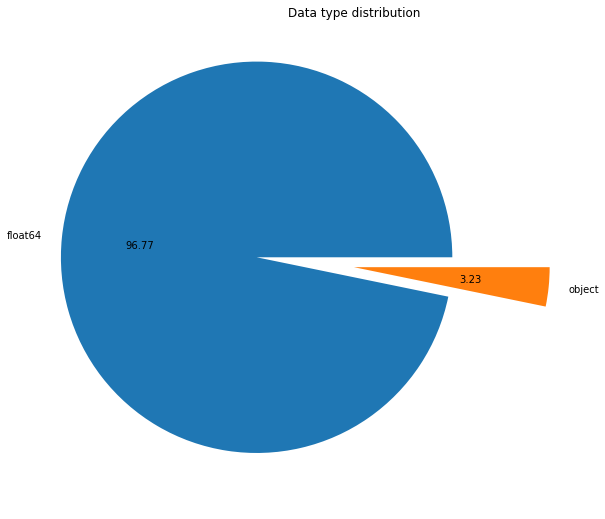

In [10]:
plt.figure(figsize=(15,9))
ax=plt.pie(data.dtypes.value_counts().values,labels=data.dtypes.value_counts().index,explode=[0.5,0],autopct='%.2f')
plt.title('Data type distribution')
plt.show()

In [11]:
features = [i for i in data.columns]
features.remove('diagnosis')

In [12]:
features

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [13]:
# univariate analysis:
def plot_one(data,feature,target='diagnosis'):
    fig,ax = plt.subplots(1,2,figsize=(15,8))
    sns.distplot(data[feature],ax=ax[0],kde=False)
    ax[0].title.set_text('Distribution plot of '+feature)
    
    sns.distplot(ax=ax[1],x=data[feature],hist=False)
    ax[1].title.set_text('Relation with target of '+feature)
    plt.show()
    

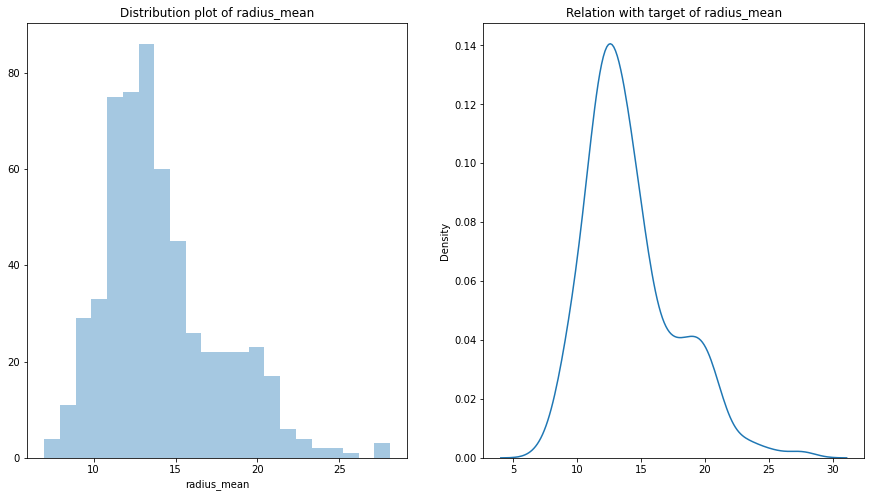

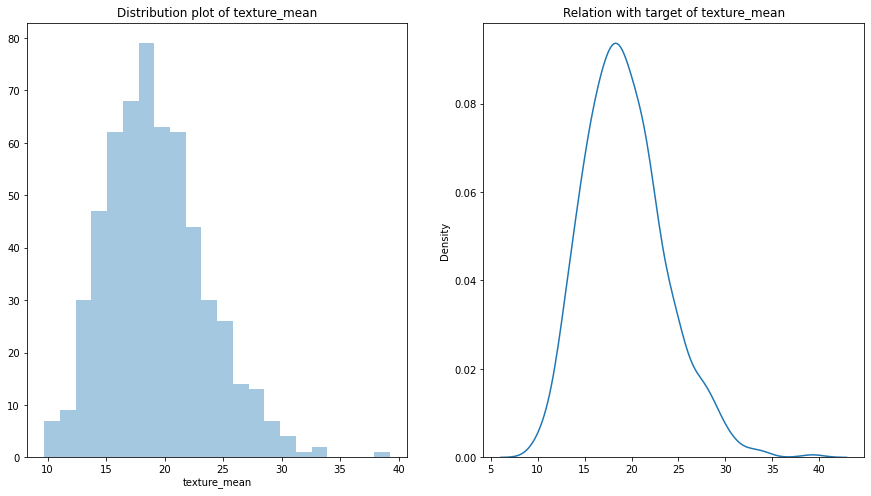

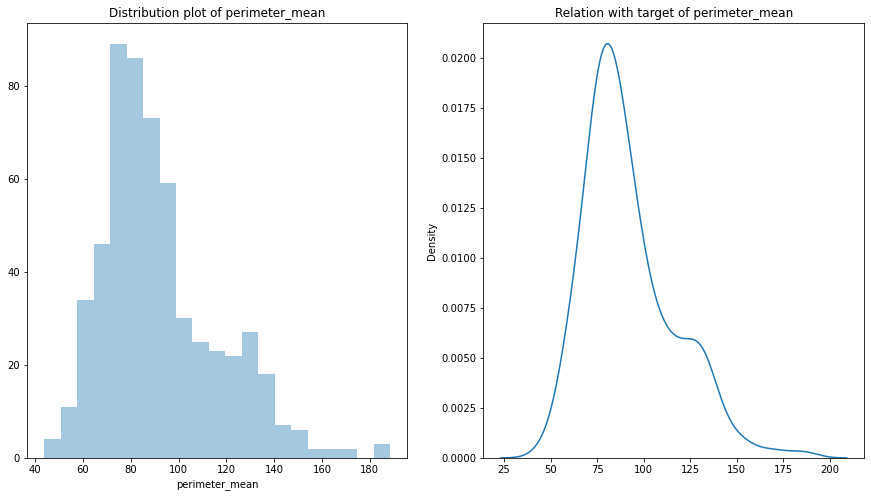

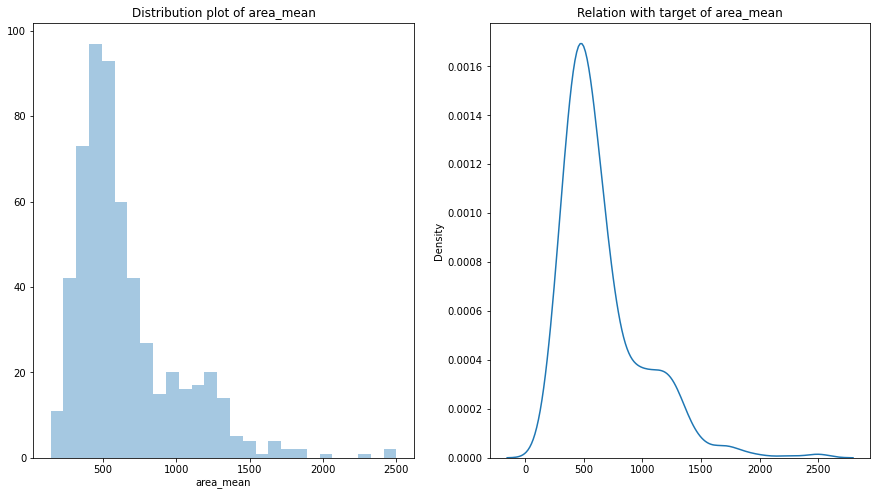

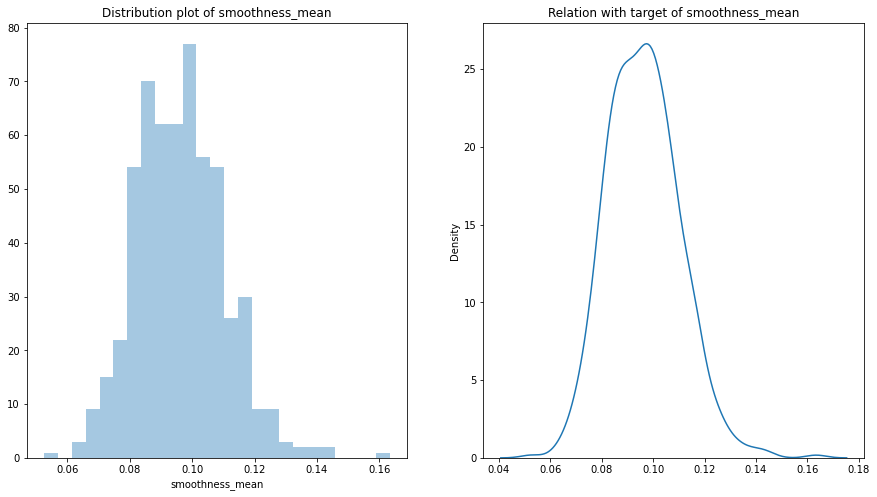

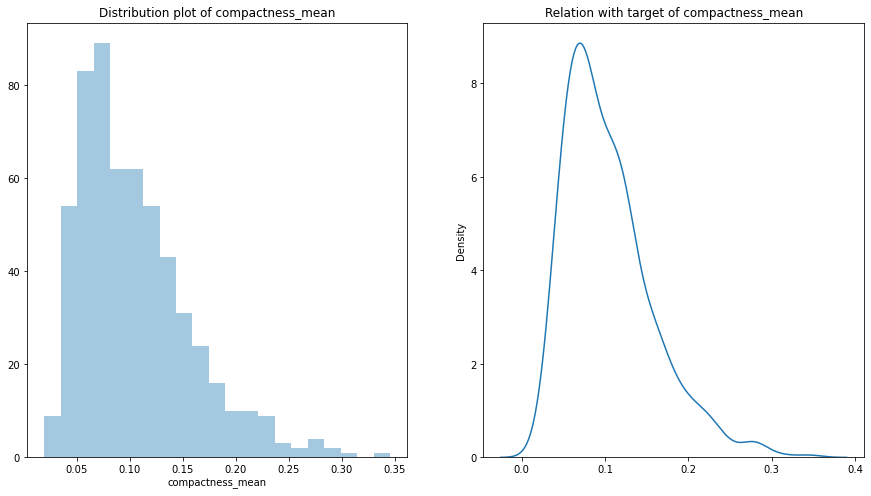

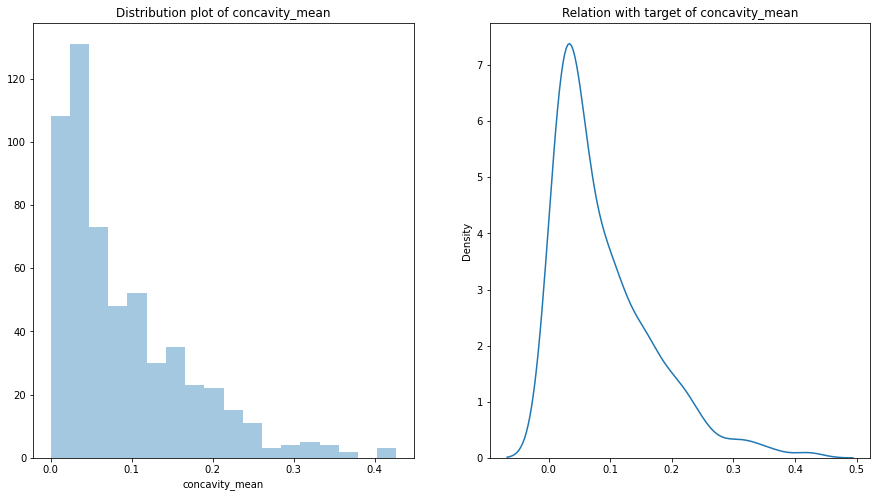

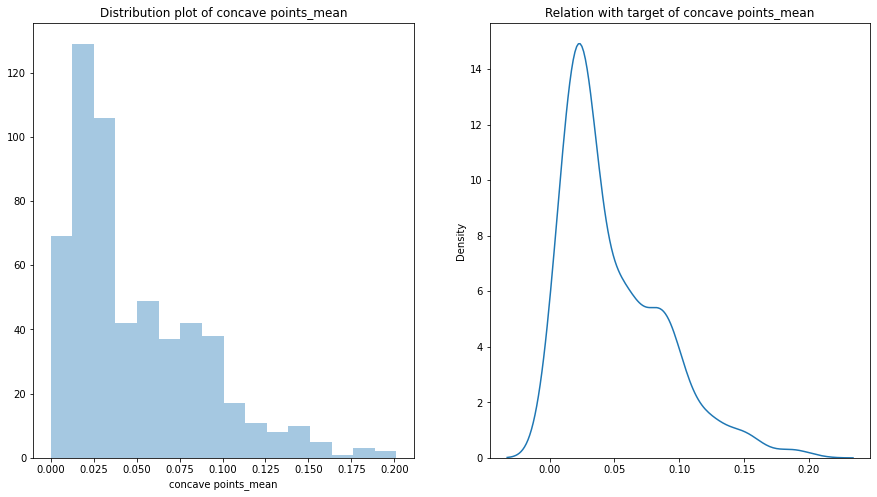

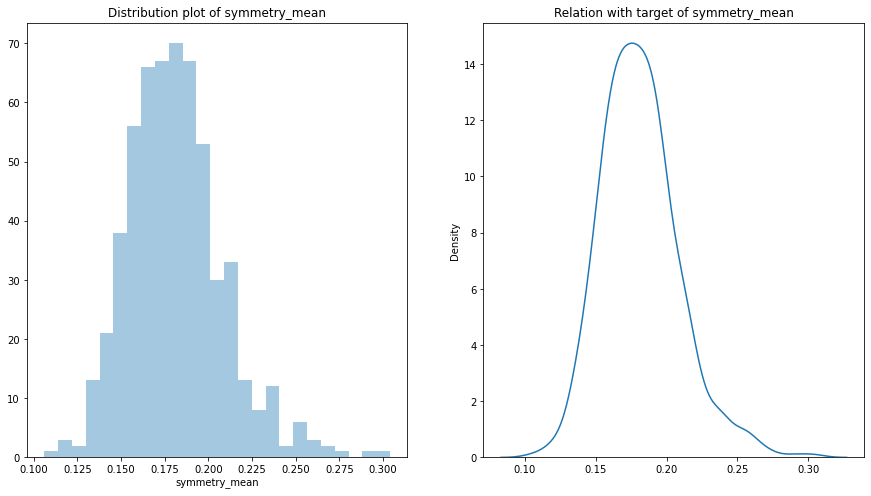

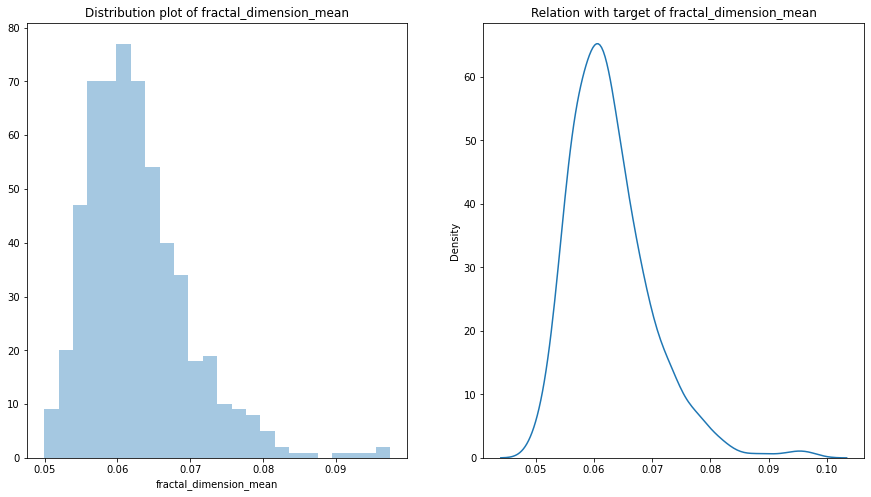

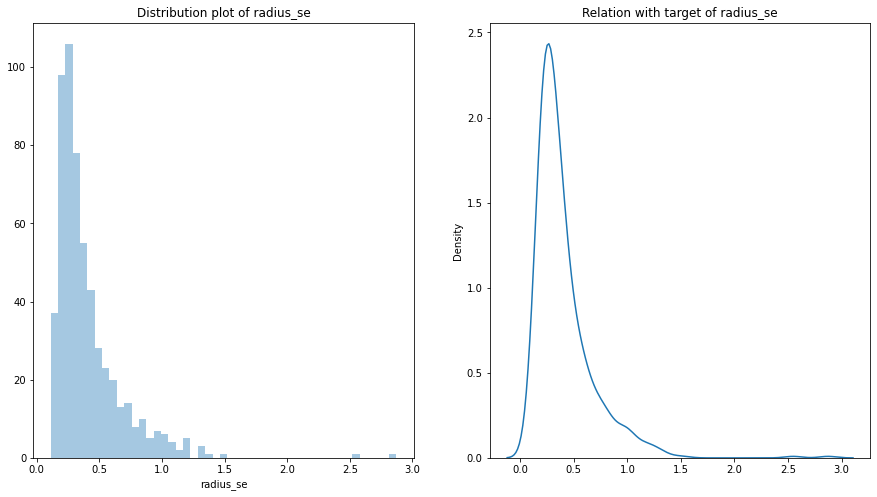

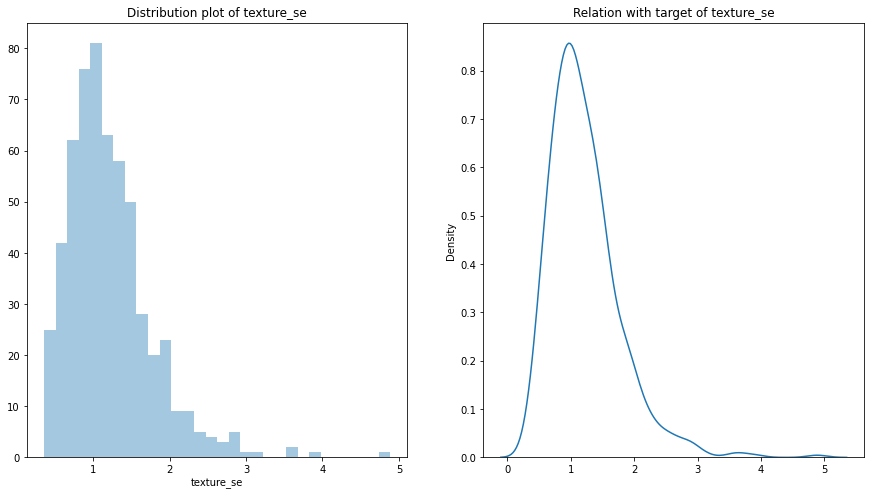

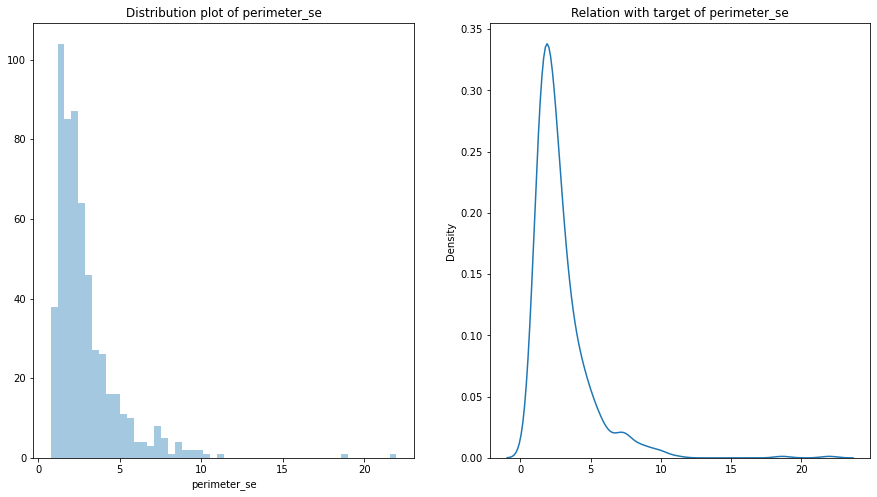

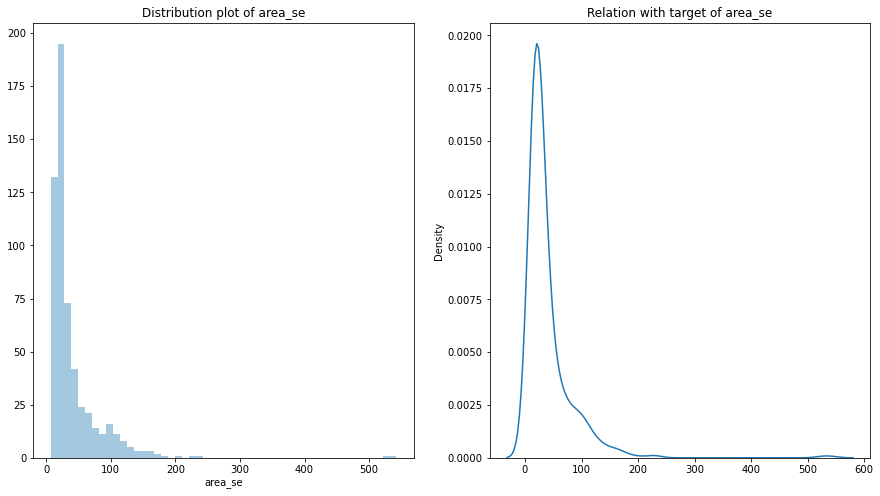

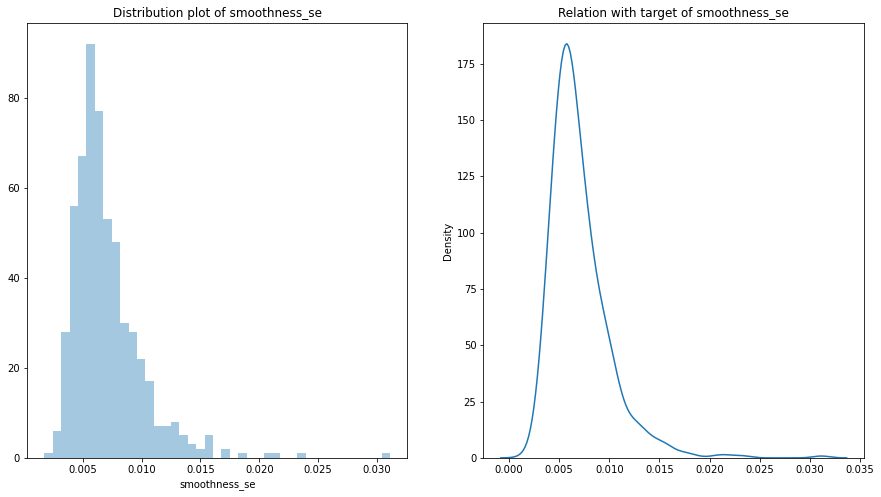

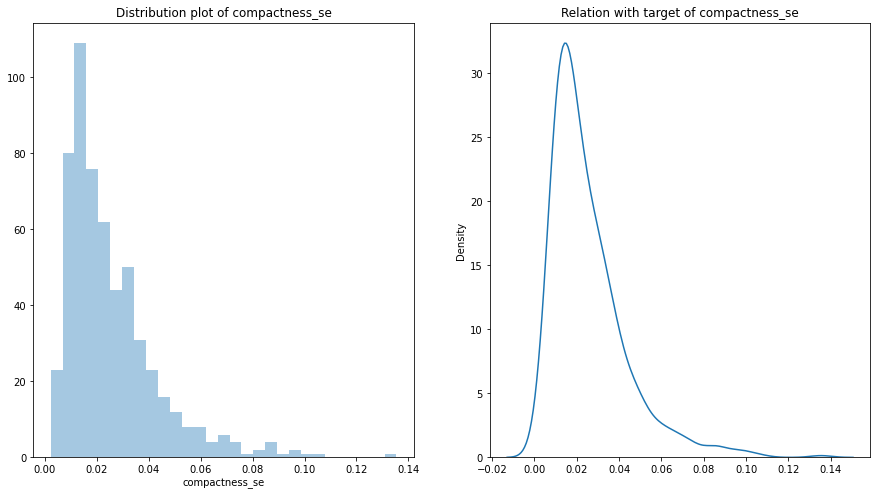

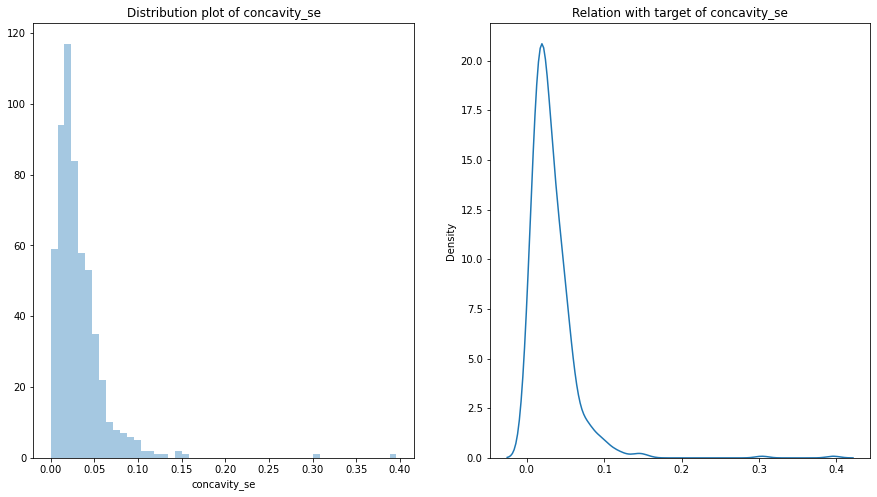

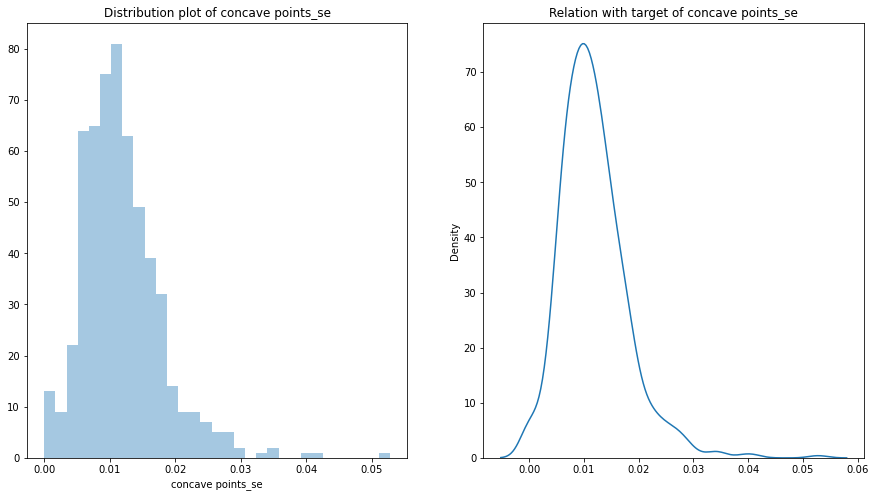

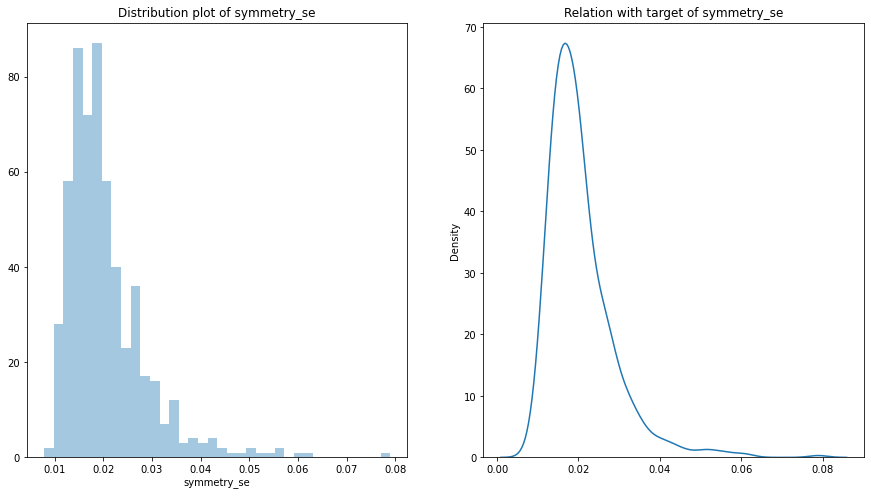

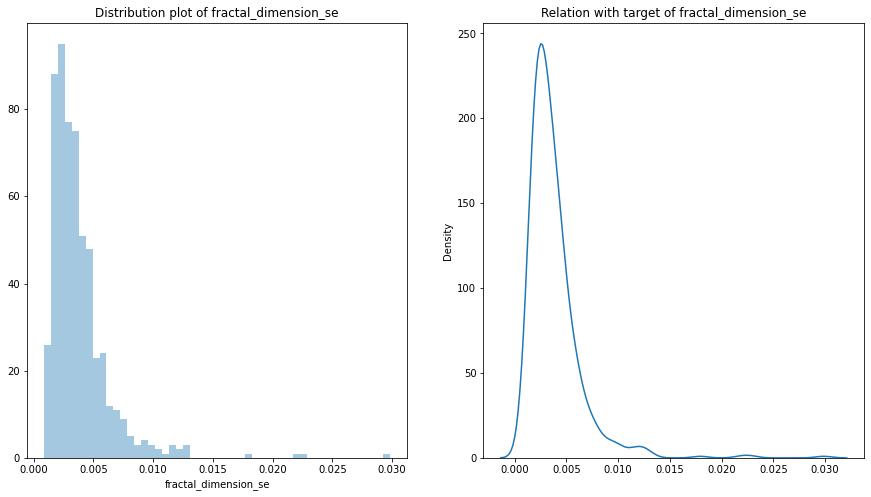

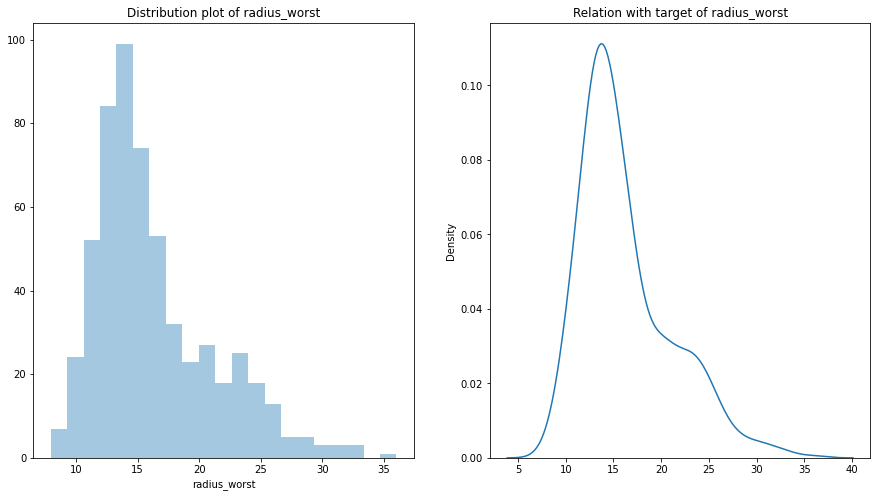

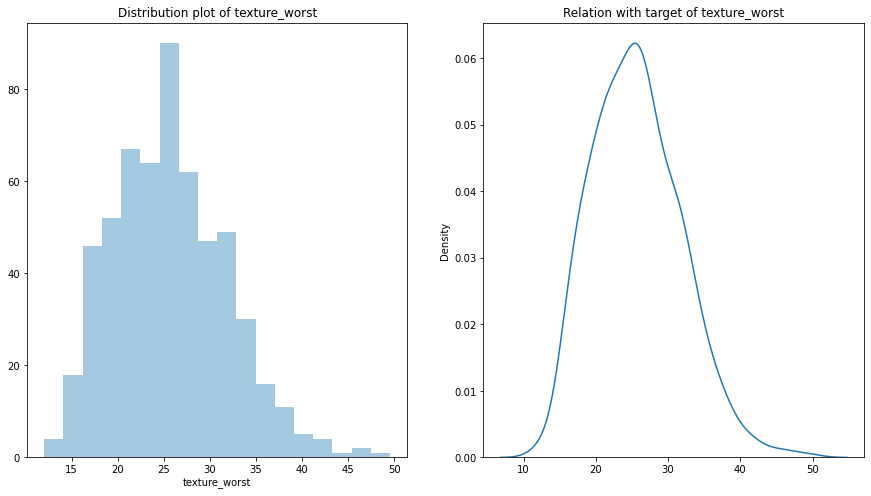

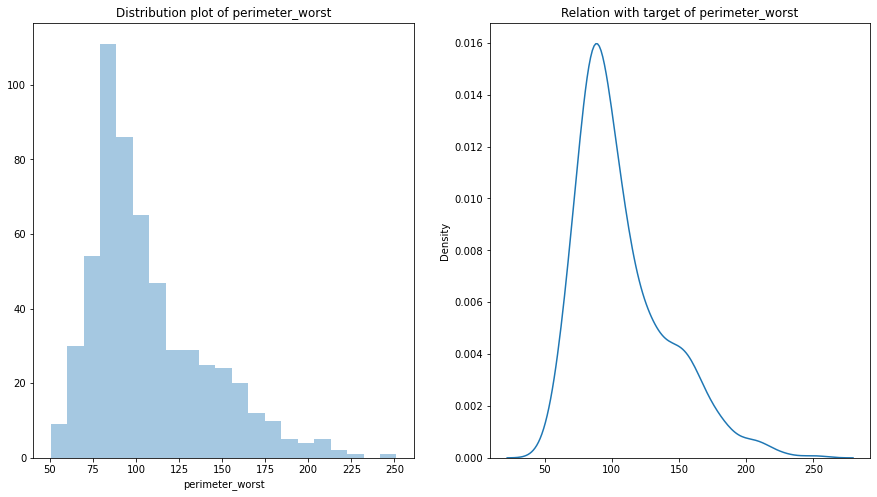

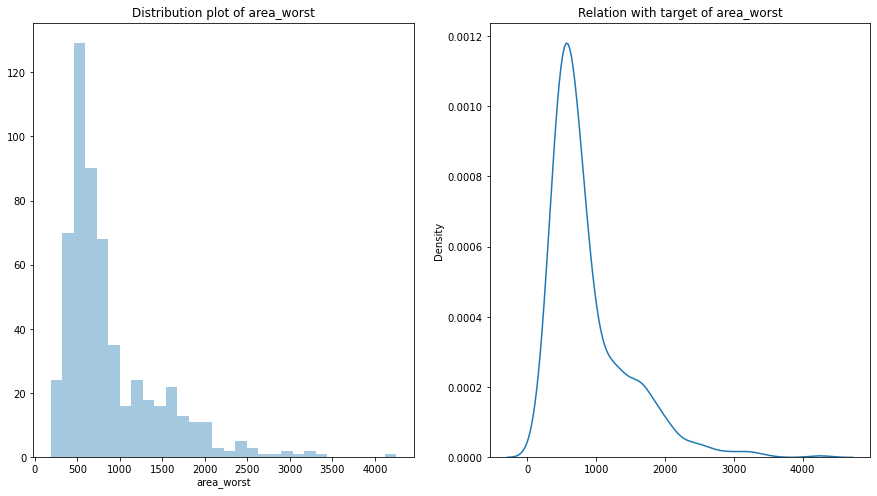

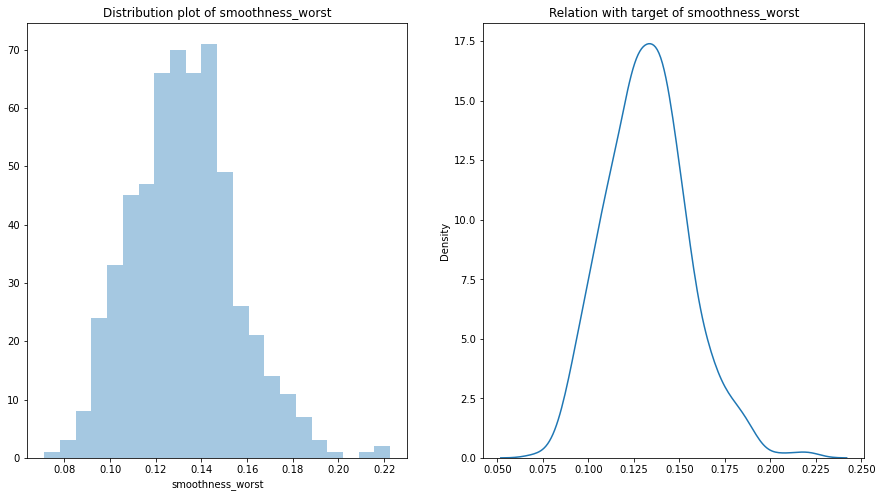

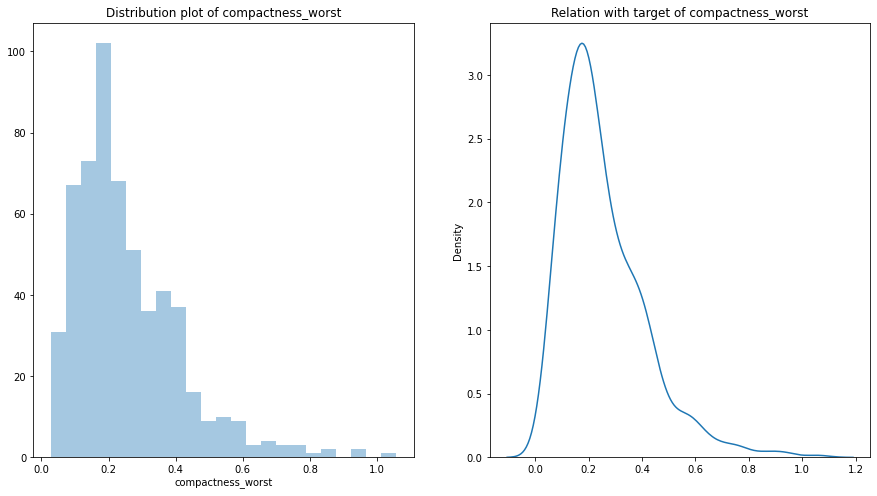

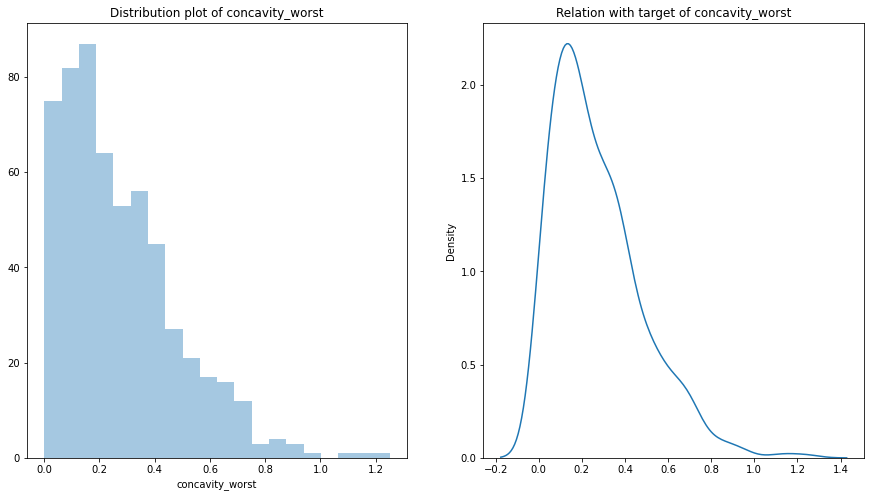

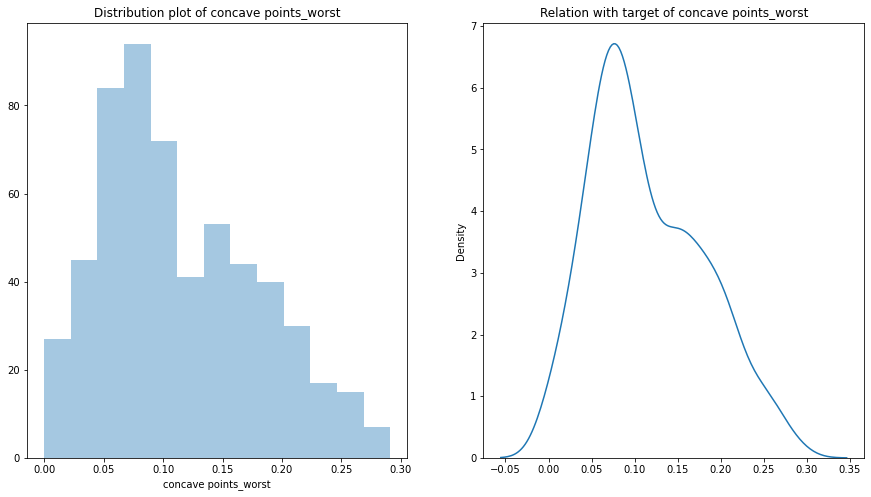

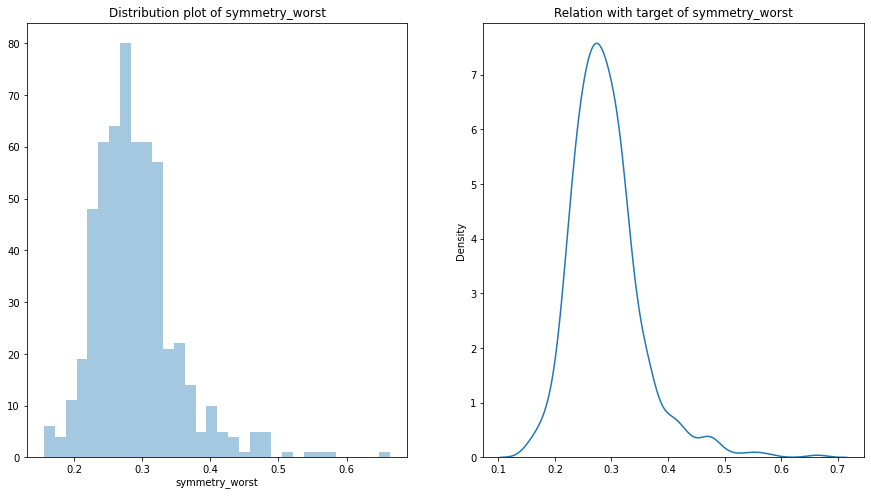

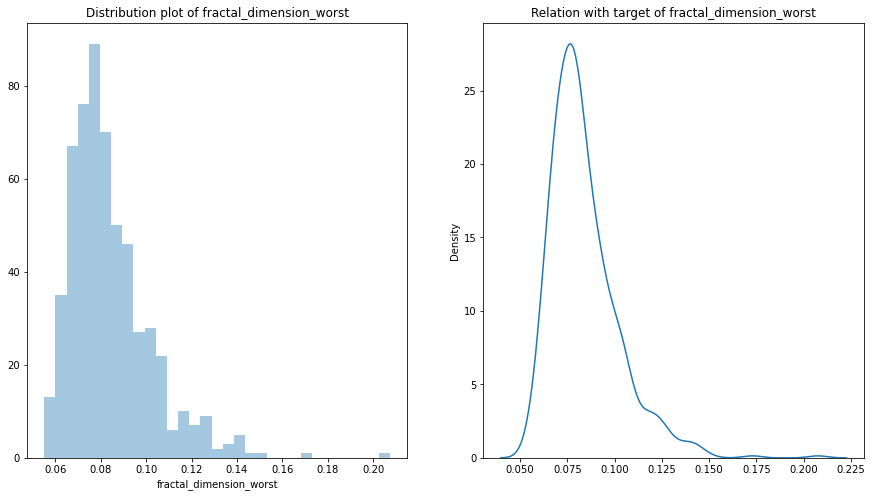

In [14]:
for feature in features:
    plot_one(data=data,feature=feature,target='diagnosis')

In [15]:
def count_plot(data):
    count = data.value_counts()
    plt.figure(figsize=(15,8))
    ax = plt.bar(height=count.values,x=count.index)
    plt.bar_label(ax,count.values)
    plt.show()

In [16]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

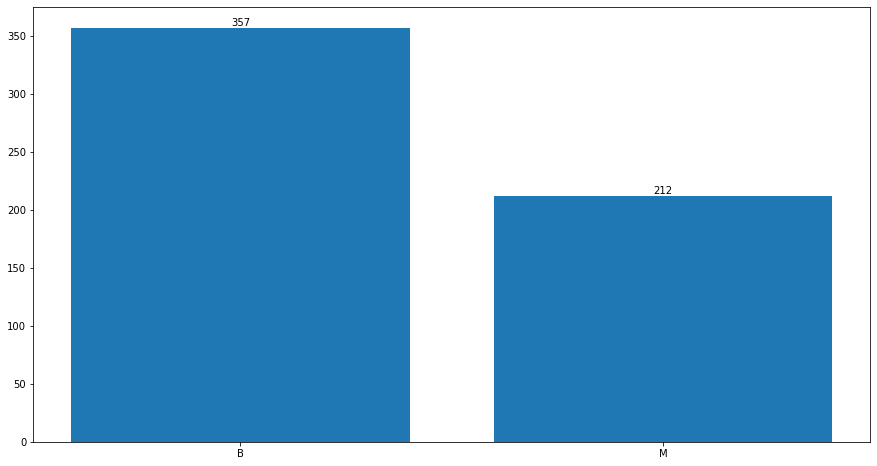

In [17]:
count_plot(data['diagnosis'])

In [18]:
def outlie(feature):
    q1 = data[feature].quantile(.25)
    q3 = data[feature].quantile(.75)
    d = data[feature]
    iqr = q3-q1
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    outliers = [x for x in d if x < low or x > high]
    return len(outliers)

In [19]:
for feature in features:
    print('Outliers in {} are : {}'.format(feature, outlie(feature)))

Outliers in radius_mean are : 14
Outliers in texture_mean are : 7
Outliers in perimeter_mean are : 13
Outliers in area_mean are : 25
Outliers in smoothness_mean are : 6
Outliers in compactness_mean are : 16
Outliers in concavity_mean are : 18
Outliers in concave points_mean are : 10
Outliers in symmetry_mean are : 15
Outliers in fractal_dimension_mean are : 15
Outliers in radius_se are : 38
Outliers in texture_se are : 20
Outliers in perimeter_se are : 38
Outliers in area_se are : 65
Outliers in smoothness_se are : 30
Outliers in compactness_se are : 28
Outliers in concavity_se are : 22
Outliers in concave points_se are : 19
Outliers in symmetry_se are : 27
Outliers in fractal_dimension_se are : 28
Outliers in radius_worst are : 17
Outliers in texture_worst are : 5
Outliers in perimeter_worst are : 15
Outliers in area_worst are : 35
Outliers in smoothness_worst are : 7
Outliers in compactness_worst are : 16
Outliers in concavity_worst are : 12
Outliers in concave points_worst are : 0
O

In [20]:
# Fill the outliers with median
def impute_median_zscore(data, threshold=3):
    z_scores = np.abs((data - np.mean(data)) / np.std(data))
    is_outlier = z_scores > threshold
    imputed_data = np.copy(data)
    imputed_data[is_outlier] = np.median(data)
    return imputed_data

In [21]:
for feature in features:
    data[feature]= impute_median_zscore(data[feature])

In [22]:
for feature in features:
    print('Outliers in {} are : {}'.format(feature, outlie(feature)))

Outliers in radius_mean are : 10
Outliers in texture_mean are : 4
Outliers in perimeter_mean are : 8
Outliers in area_mean are : 29
Outliers in smoothness_mean are : 2
Outliers in compactness_mean are : 9
Outliers in concavity_mean are : 12
Outliers in concave points_mean are : 12
Outliers in symmetry_mean are : 11
Outliers in fractal_dimension_mean are : 11
Outliers in radius_se are : 38
Outliers in texture_se are : 12
Outliers in perimeter_se are : 35
Outliers in area_se are : 59
Outliers in smoothness_se are : 25
Outliers in compactness_se are : 22
Outliers in concavity_se are : 24
Outliers in concave points_se are : 14
Outliers in symmetry_se are : 22
Outliers in fractal_dimension_se are : 21
Outliers in radius_worst are : 15
Outliers in texture_worst are : 1
Outliers in perimeter_worst are : 13
Outliers in area_worst are : 39
Outliers in smoothness_worst are : 4
Outliers in compactness_worst are : 15
Outliers in concavity_worst are : 5
Outliers in concave points_worst are : 0
Outl

In [23]:
# Lets use other method
data = pd.read_csv('/kaggle/input/breast-cancer-dataset/breast-cancer.csv')
data = data.drop('id',1)

import numpy as np
import pandas as pd

def impute_outliers(df, threshold=3):
    """
    Identify outliers using the Z-score method, create new columns indicating the presence of an outlier with 1 or 0,
    and impute the outlier with the median value for each feature.
    
    Parameters:
    df (pandas.DataFrame): A Pandas DataFrame containing numerical data.
    threshold (float): The Z-score threshold for identifying outliers.
    
    Returns:
    A new Pandas DataFrame with outliers imputed with the median value for each feature.
    """
    z_scores = np.abs((df - df.mean()) / df.std())
    is_outlier = z_scores > threshold
    imputed_df = df.copy()
    for column in df.columns:
        has_outlier = is_outlier[column]
        imputed_df[f'{column}_has_outlier'] = has_outlier.astype(int)
        column_median = df[column].median()
        imputed_df[column] = imputed_df[column].where(~has_outlier, column_median)
    return imputed_df

In [24]:
diagnosis = data['diagnosis']
data = impute_outliers(data[features])
data['target'] = diagnosis

In [25]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst_has_outlier,perimeter_worst_has_outlier,area_worst_has_outlier,smoothness_worst_has_outlier,compactness_worst_has_outlier,concavity_worst_has_outlier,concave points_worst_has_outlier,symmetry_worst_has_outlier,fractal_dimension_worst_has_outlier,target
0,17.99,10.38,122.80,1001.0,0.11840,0.09263,0.3001,0.14710,0.2419,0.07871,...,0,0,0,0,0,0,0,0,0,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0,0,0,0,0,0,0,0,0,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0,0,0,0,0,0,0,0,0,M
3,11.42,20.38,77.58,386.1,0.09587,0.09263,0.2414,0.10520,0.2597,0.06154,...,0,0,0,1,1,0,0,1,1,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0,0,0,0,0,0,0,0,0,M


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import f1_score,confusion_matrix,log_loss,roc_curve
from imblearn.over_sampling import SMOTE

In [27]:
dict_map = {'M':1,'B':0}

y = data['target'].replace(dict_map)
x = data.drop('target',1)


In [28]:
smote = SMOTE()
x_res,y_res = smote.fit_resample(x,y)

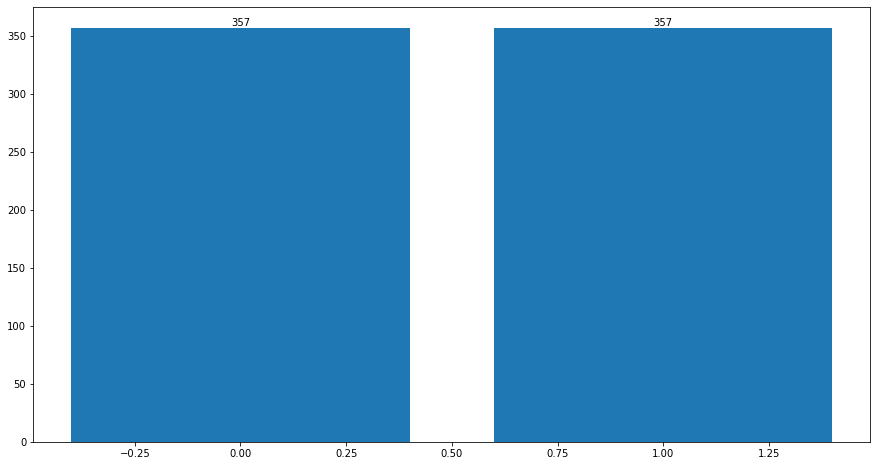

In [29]:
count_plot(y_res)

In [30]:
x = np.array(x_res)
y = np.array(y_res)

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=28)

In [32]:
def predict_plot(clf,x_train,x_test,y_train,y_test):
    model = clf
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    print('F1 Score : ',f1_score(y_test,pred))
    print('Loss : ',log_loss(y_test,pred))
    mat = confusion_matrix(y_test,pred)
    
    plt.figure(figsize=(15,8))
    sns.heatmap(mat,annot=True,linewidths=0.5,fmt='.2f')
    plt.title('CONFUSION MATRIX')
    plt.xlabel('ACTUAL VALUE')
    plt.ylabel('PREDICTED VALUE')
    plt.show()
    
    plt.figure(figsize=(15,8))
    pred_train = model.predict(x_train)
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred)
    
    plt.plot(fpr_train, tpr_train, label='Train')
    plt.plot(fpr_test, tpr_test, label='Test')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Let's check base for our metrics with Random model
* Determine metrics values for a worst model so we can compare our model with them

In [33]:
import random
class RandomModel():
    len_x = 0
    len_y = 0
    def __init__(self):
        pass
    def fit(self,x,y):
        pass
    def predict(self,x):
        result = []
        for i in range(len(x)):
            result.append(random.randint(0, 1))
        return result  

F1 Score :  0.5033112582781457
Loss :  18.114972119670902


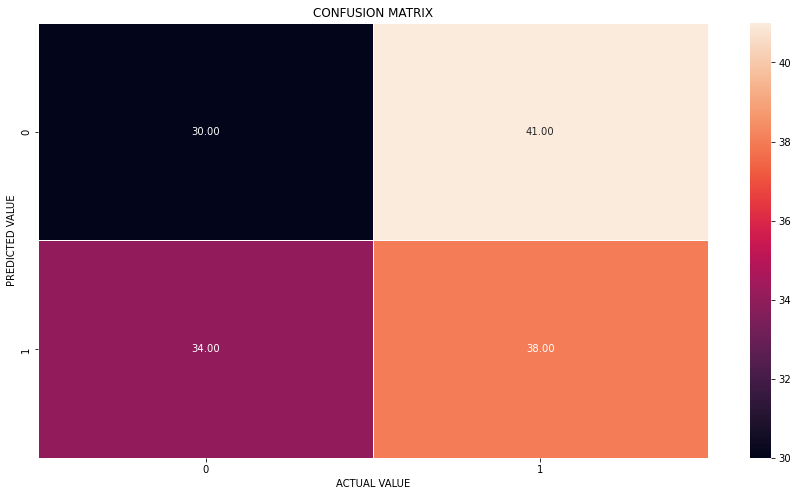

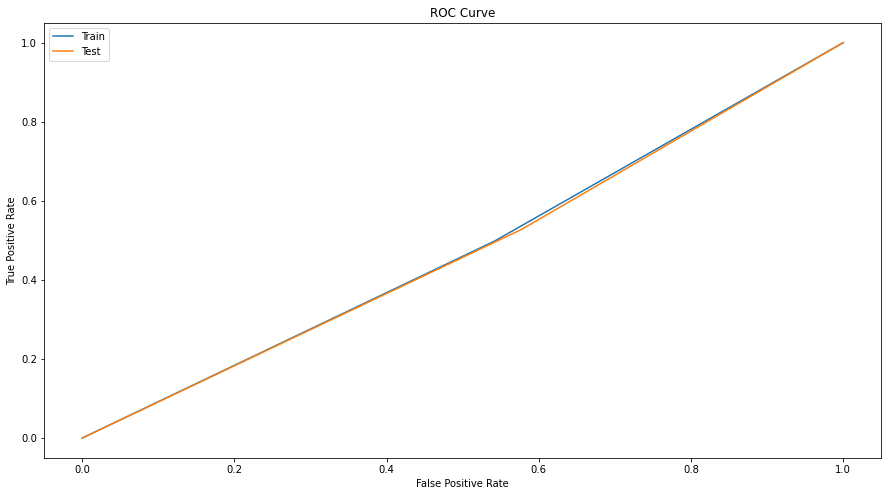

In [34]:
predict_plot(RandomModel(),x_train,x_test,y_train,y_test)

# Metrics to get:
* Loss < 15.69
* F1_score > 0.57

# 1. Logistic Regression

F1 Score :  0.9659863945578231
Loss :  1.207671890659261


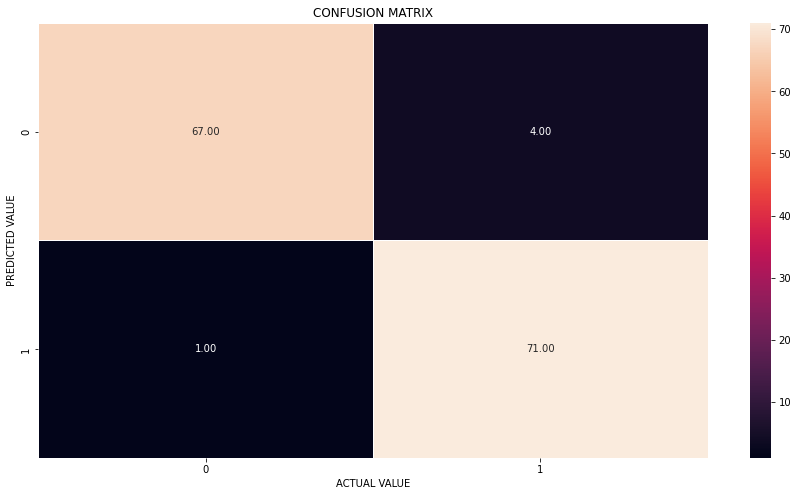

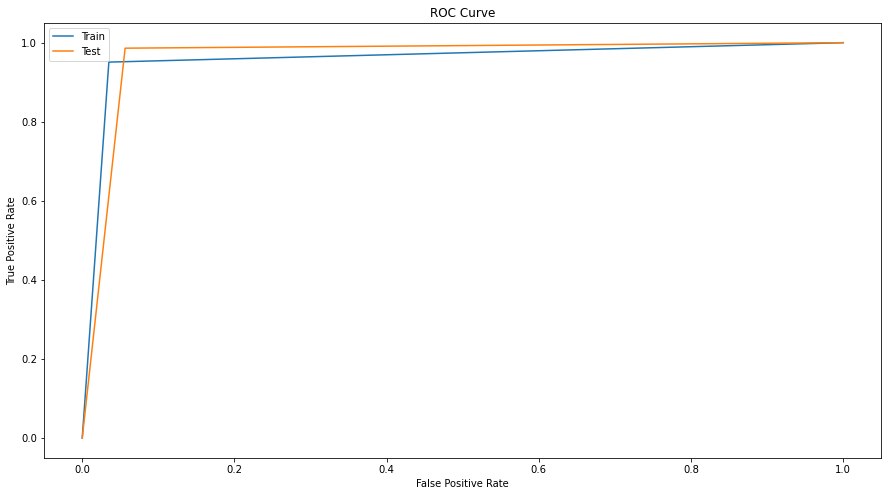

In [35]:
predict_plot(LogisticRegression(n_jobs=-1),x_train,x_test,y_train,y_test)

# 2. Random Forest

F1 Score :  0.9523809523809524
Loss :  1.6907372919687125


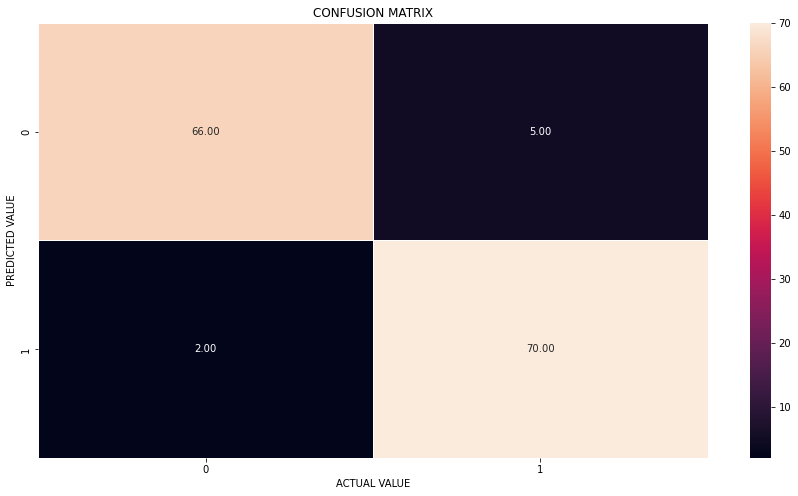

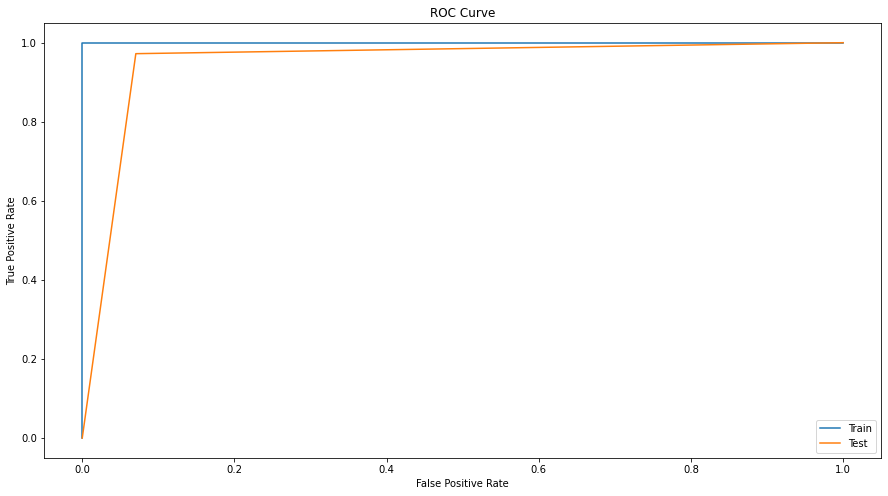

In [36]:
predict_plot(RandomForestClassifier(n_jobs=-1,max_depth=7,n_estimators=200),x_train,x_test,y_train,y_test)

# 3. XGBOOST

F1 Score :  0.9466666666666667
Loss :  1.9322783800090695


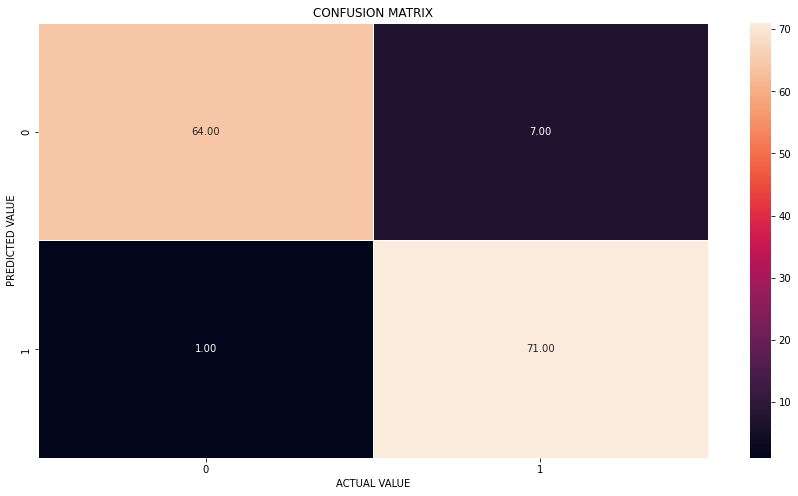

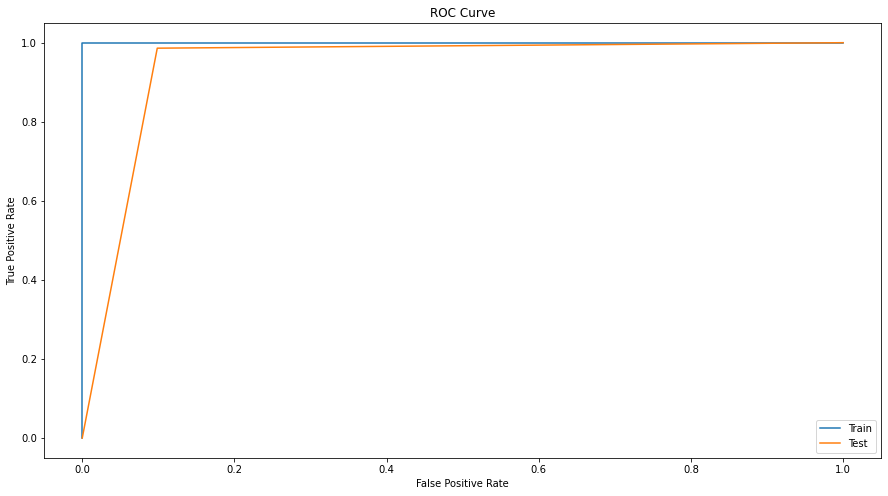

In [37]:
predict_plot(XGBClassifier(n_jobs=-1),x_train,x_test,y_train,y_test)

# Hyper Parameter tuning

# 1. Logistic Regression

F1 Score :  0.9726027397260274
Loss :  0.9661363942093247


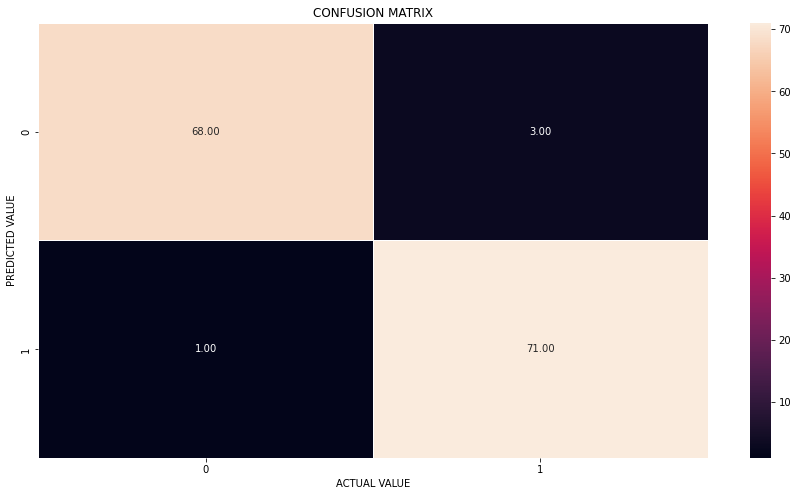

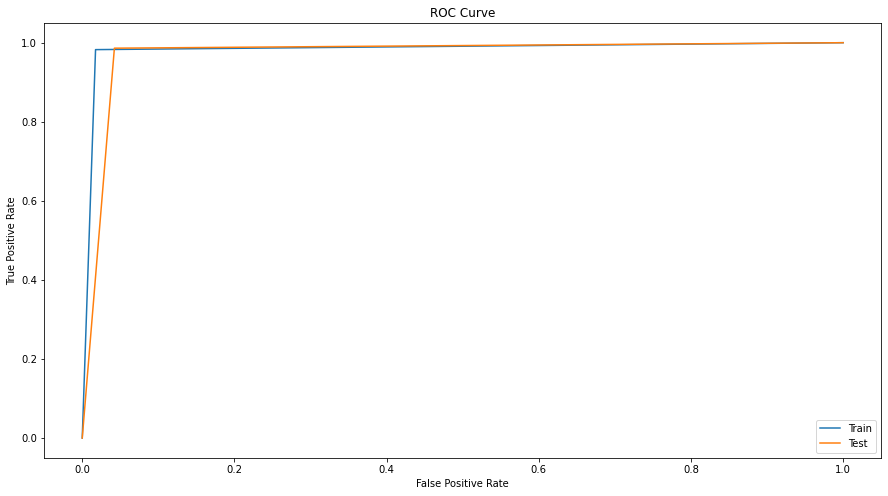

In [38]:
logreg = LogisticRegression()

param_grid = {
    'C': [0.001,0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2','elasticnet'],
    'solver': ['liblinear','saga','sag']
}
grid_search = GridSearchCV(logreg, param_grid, cv=5)
predict_plot(grid_search,x_train,x_test,y_train,y_test)

# 2. Random Forest

F1 Score :  0.9594594594594595
Loss :  1.449207387109197


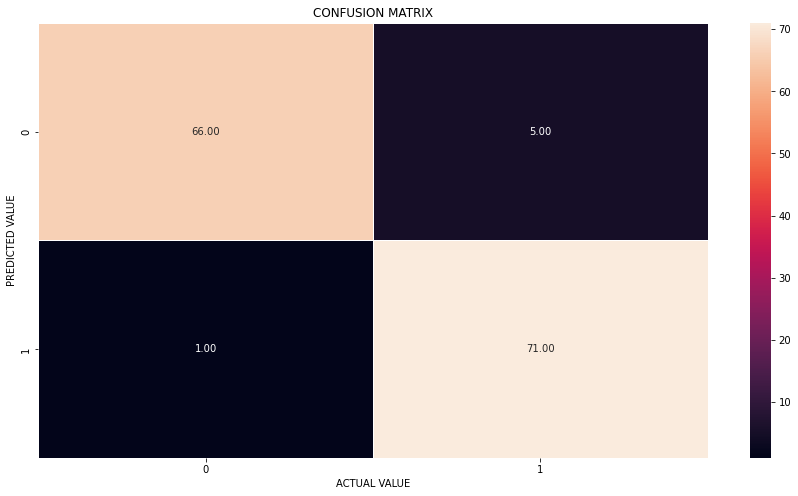

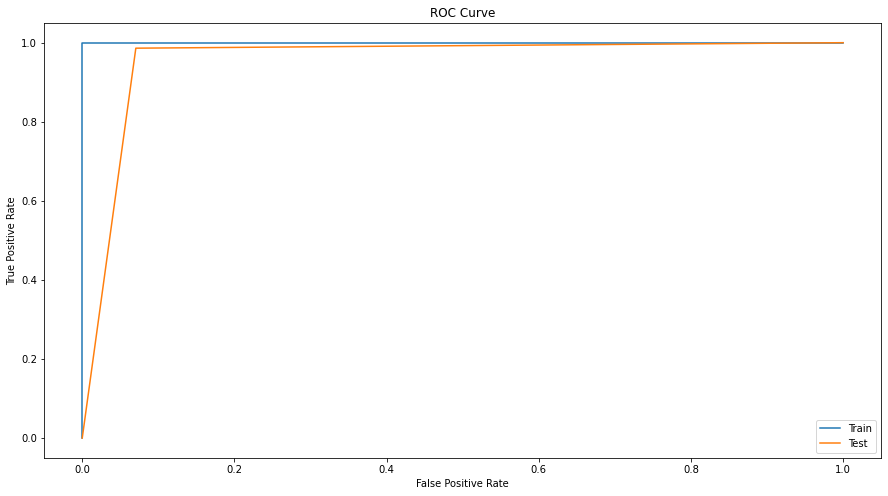

In [39]:
rfc = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 9, 10, 20],
    'max_features': ['sqrt', 'log2']
}
grid_search = GridSearchCV(rfc, param_grid, cv=5)
predict_plot(grid_search,x_train,x_test,y_train,y_test)

# 3. XGBOOST

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


F1 Score :  0.9726027397260274
Loss :  0.9661363942093247


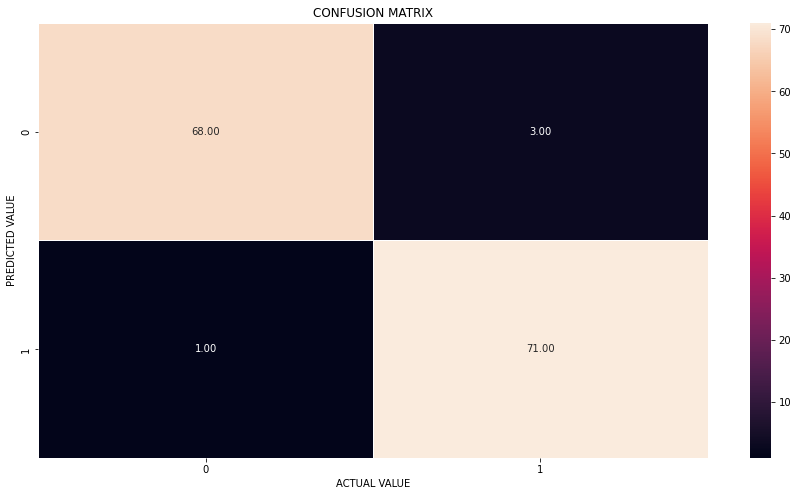

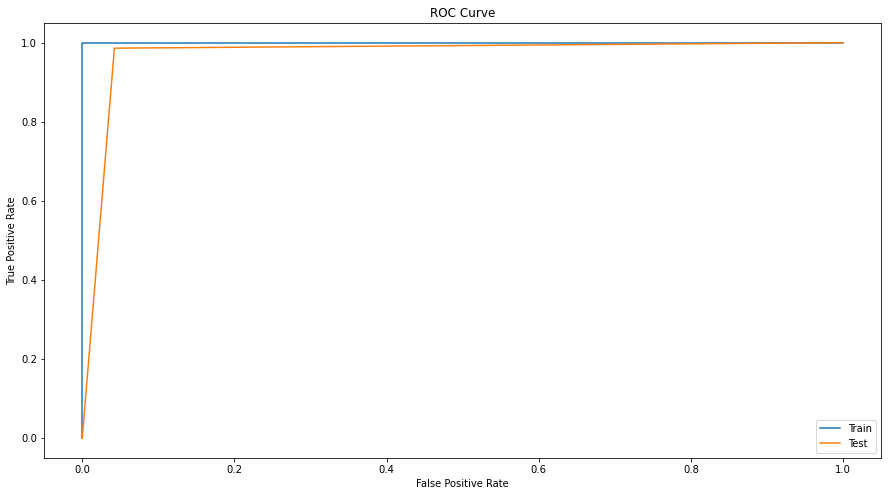

In [40]:
xgb = XGBClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}
grid_search = GridSearchCV(xgb, param_grid, cv=5)
predict_plot(grid_search,x_train,x_test,y_train,y_test)